<a href="https://colab.research.google.com/github/jaynetra/AIForHealthCare_Mimic3/blob/main/Word2VECandtSNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re

from gensim.models import word2vec

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

# Using Spacy

In [ ]:
! pip install -U pip setuptools wheel
! pip install -U spacy
! python -m spacy download en_core_web_sm

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [3]:
# load headache notes
from google.colab import files
uploaded = files.upload()

Saving notes_sinus.csv to notes_sinus (1).csv


In [4]:
notes = []
with open('notes_sinus.csv', 'r') as fin:
  lines = fin.readlines()
  for line in lines:
    notes.append(line)
print(notes)
print(len(notes))

['text\n', '"Sinus rhythm. Possible left atrial enlargement. Delayed R wave progression.\n', 'Diffuse inferior and lateral ST-T wave abnormalities. Compared to the previous\n', 'tracing no diagnostic change.\n', 'TRACING #3\n', '\n', '"\n', '"Atrial fibrillation with rapid ventricular rate of 130.  Diffuse non-diagnostic\n', 'repolarization abnormalities.  Compared to the previous tracing of [**2198-6-30**]\n', 'no diagnostic change.\n', '\n', '"\n', '"Sinus bradycardia. Prolonged Q-T interval. Left axis deviation.\n', 'Intraventricular conduction delay. Poor R wave progression. Possible anterior\n', 'wall myocardial infarction. Compared to the previous tracing no significant\n', 'change.\n', '\n', '"\n', '"Sinus bradycardia. P-R interval prolongation and marked Q-T interval\n', 'prolongation. Motion artifact. Downsloping ST segments with deeply inverted\n', 'T waves in leads I, II, aVL, aVF and V2-V6. Cannot exclude ischemia or acute\n', 'cerebrovascular event. Delayed R wave progress

In [5]:
df=notes

In [6]:
# Build corpus of all the entities extracted from the notes using spaCy model.
# The corpus is an array of arrays or list of lists where each of the nested lists corresponds to a note.
corpus=[]
for row in range(0, len(df)):
  str_tokens=[]
  tokens= nlp(df[row]).ents
  for i in range(0, len(tokens)):
    str_tokens.append(tokens[i].text)
  corpus.append(list(str_tokens))


print(corpus)

[[], [], [], [], ['#3'], [], [], ['130'], ['2198-6-30'], [], [], [], [], [], [], [], [], [], [], [], ['V2-V6'], [], ['2171-11-6'], [], [], [], ['2161-9-14', '2161-9-19'], [], ['2097-12-16'], [], [], [], [], ['No Known Allergies to Drugs'], [], ['Attending:[**First Name3', '348'], [], [], [], [], [], [], [], [], [], ['63', 'several day'], ['HA'], [], ['1 day'], ['RBC'], ['SAH w/u. REpeat LP\n'], ['RBC', 'xantho'], [], ['acyclovir', 'Rocephin'], [], [], ['2158'], [], ['3 days'], [], [], [], ['pancreatitis s'], ['liver fluid'], [], [], [], [], [], [], [], [], [], [], [], ['Family History'], [], [], [], ['99.7', 'BP 150/80', 'P100', '16', '96%', 'RA'], [], ['Kernig'], ['perrla\n'], [], ['reg s1/s2'], [], [], ['Neuro', 'x3'], ['2-12'], ['3-25'], [], ['DTR'], [], [], [], ['4.4', '7.7', '5.1'], ['1.0'], ['BUN 11'], ['4'], [], ['CSF'], [], ['1', 'WBC', '60', '1110', '92%'], ['2', '88', '95'], ['4', 'WBC', '80', '6850', '91%'], [], ['Lyme', 'VDRL', 'eastern', 'First'], [], ['Blood Cultures -'],

The vectors generated by Word2Vec, as implemented by the Gensim library, are specific to the corpus used for training. Word2Vec learns word embeddings by analyzing the patterns of word co-occurrence within the given training corpus. As a result, the learned word vectors capture the semantics and relationships of words as they appear in that particular corpus.

In other words, the word embeddings produced by Word2Vec are not universal but are context-dependent. They represent how words are related to each other within the specific textual data provided during training. Therefore, if you train a Word2Vec model on one corpus and then train another model on a different corpus, the word vectors learned by each model may differ because they reflect the linguistic patterns and context of their respective training data.

To create word vectors that are more general and applicable across different contexts, larger and more diverse training corpora are often used. Pretrained Word2Vec models, such as those trained on massive text datasets like Wikipedia or news articles, offer word vectors that are more general and can be used as a starting point for various natural language processing tasks. These pretrained embeddings capture a broad range of linguistic knowledge from diverse sources, making them useful in many applications.

In summary, Word2Vec word vectors are specific to the training corpus but can be made more universal by training on larger and more diverse datasets or by using pretrained embeddings.

In [7]:
from gensim.models import Word2Vec
model1 = Word2Vec(corpus, min_count=1)

In [9]:
model1.wv['Tablet']

array([ 0.00381585,  0.00232068, -0.00318235, -0.00719993,  0.00357476,
        0.00512221, -0.00720295,  0.00616791,  0.00328127,  0.0035756 ,
       -0.005725  , -0.00414658, -0.00011582,  0.00776521,  0.00760471,
       -0.00471216, -0.00474179, -0.00383944, -0.00903185, -0.00782729,
       -0.00397566, -0.00982896, -0.00939619,  0.00225532,  0.00555775,
       -0.00107351,  0.00121846, -0.0057605 ,  0.00357033, -0.00310327,
       -0.00150068, -0.00165732,  0.00382634, -0.0054492 , -0.00722148,
       -0.00534313,  0.00290288, -0.00840939,  0.01021519, -0.00760887,
       -0.00339739, -0.01129536, -0.00226538, -0.00229675, -0.00190094,
       -0.00696354,  0.00420996, -0.00036948,  0.00062804,  0.01037887,
       -0.005472  , -0.00082641, -0.00820889, -0.00195399,  0.00714503,
        0.00868103, -0.00556565,  0.00098618,  0.00502365,  0.00148771,
        0.00904268, -0.00482735, -0.00714467,  0.00763177,  0.00446236,
        0.01087448,  0.00278984, -0.00815388,  0.00079396, -0.00

In [10]:
model1.wv.similar_by_word('Tablet') #please read the below note for explaination of following output

[('2190', 0.4115068018436432),
 ('5-mm', 0.3429962694644928),
 ('2147-10-12', 0.32509511709213257),
 ('98', 0.32335802912712097),
 ('6122', 0.3060133159160614),
 ('2200-10-30', 0.30079126358032227),
 ('lacunar', 0.29721152782440186),
 ('15.9', 0.28667595982551575),
 ('18', 0.2818845808506012),
 ('97.3', 0.28023213148117065)]

The output shows words that are not semantically similar to "Tylenol." This can happen if the training data used to train the Word2Vec model does not contain enough context or examples of the word "Tylenol" and its related terms, or if the model's parameters (such as min_count) are not set appropriately.

In this case since Tylenol appears only once in the entire corpus, min_count has to be set to 1. (The model ignores all words that appear less than min_count times)

This comes at a cost, means that even very infrequent words are included in the vocabulary. This can lead to noisy word embeddings for rare words.

In [11]:
def tsne_plot(model,words, preTrained=False):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in words:
      if preTrained:
          tokens.append(model[word])
      else:
          tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


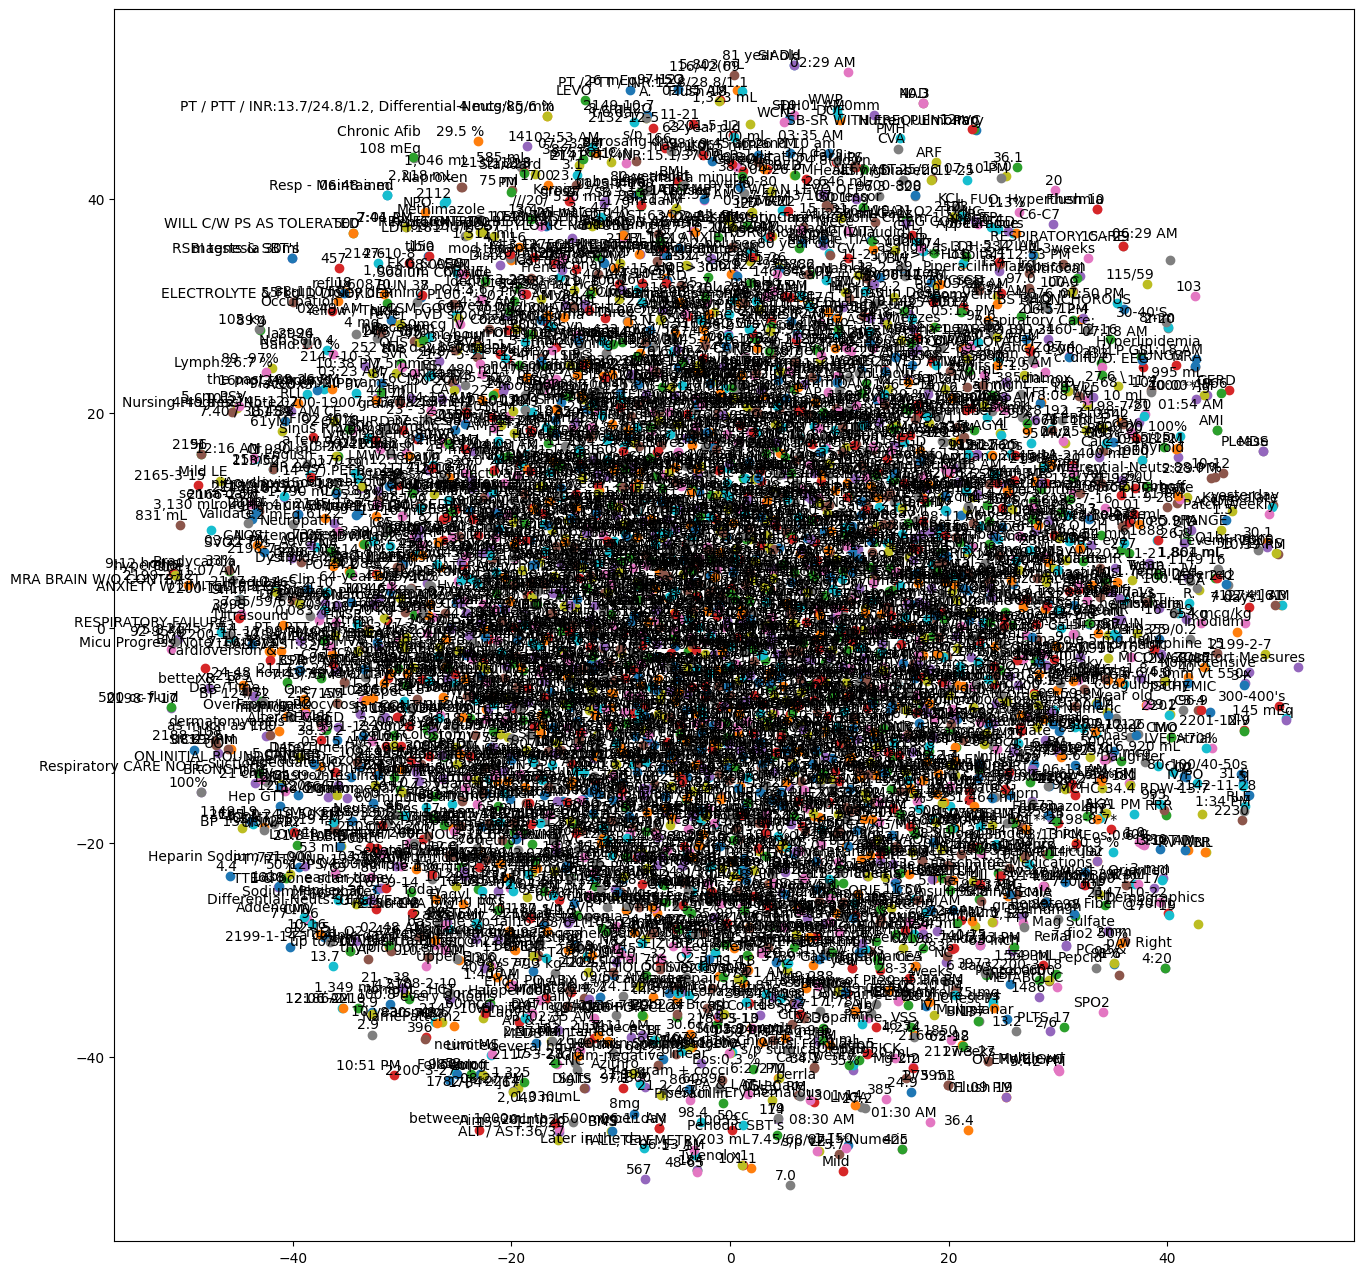

In [12]:
vocabs = model1.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model1,new_v)